## importing required libraries

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## reading data

In [191]:
df = pd.read_csv('datasets_13720_18513_insurance.csv')

In [153]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [155]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Visualizing data

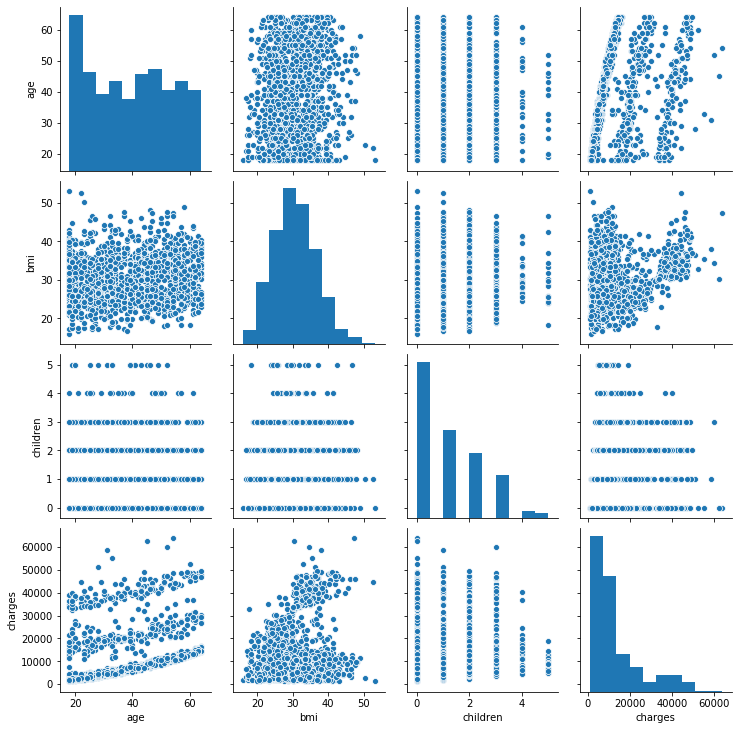

In [156]:
sns.pairplot(df)

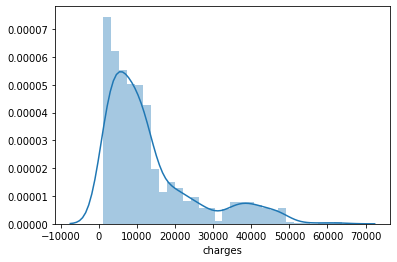

In [157]:
sns.distplot(df['charges'])

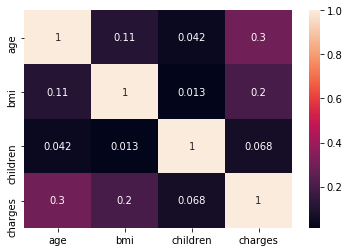

In [11]:
sns.heatmap(df.corr(),annot=True)

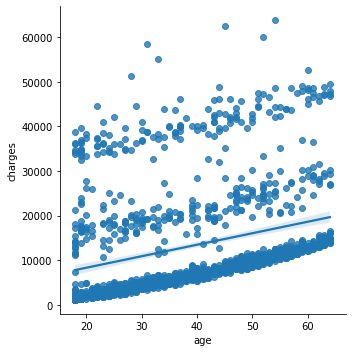

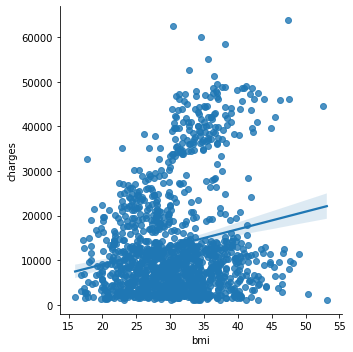

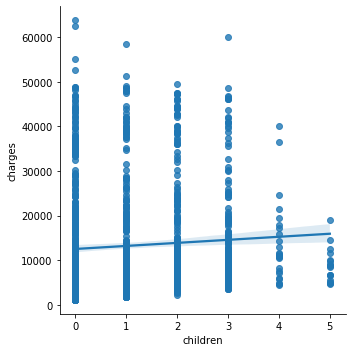

In [158]:
for x in ['age', 'bmi', 'children']:
    sns.lmplot(x=x, y='charges',data=df)

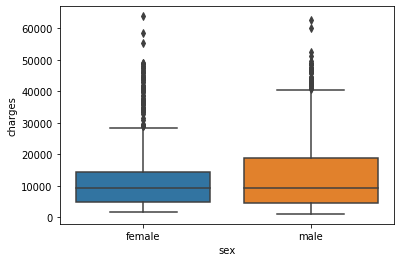

In [159]:
sns.boxplot(x='sex', y='charges', data=df)

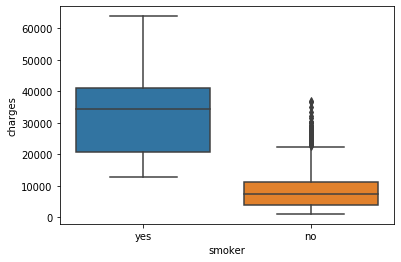

In [160]:
sns.boxplot(x='smoker', y='charges', data=df)

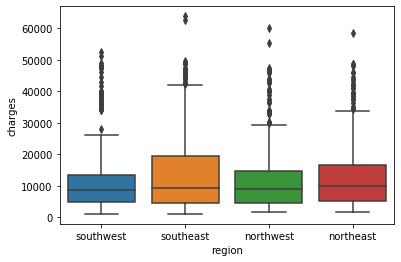

In [161]:
sns.boxplot(x='region', y='charges', data=df)

## Encoding categrocal variable to numerical data

In [169]:
from sklearn.preprocessing import OneHotEncoder

In [193]:
dum = pd.get_dummies(df[['sex']], columns=["sex"], prefix=["sex_is"] )

df['sex'] = df['sex'].astype('category')
df = df.join(dum)
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_is_female,sex_is_male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [194]:
dum = pd.get_dummies(df[["smoker"]], columns=["smoker"], prefix=["smoker_"])


In [195]:
df['smoker'] = df['smoker'].astype('category')
df = df.join(dum)
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_is_female,sex_is_male,smoker__no,smoker__yes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0


In [196]:
dum = pd.get_dummies(df[["region"]], columns=["region"], prefix=["region_"])


In [197]:
df['region'] = df['region'].astype('category')
df = df.join(dum)
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_is_female,sex_is_male,smoker__no,smoker__yes,region__northeast,region__northwest,region__southeast,region__southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


## Dividing data into test and train sets

In [198]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_is_female', 'sex_is_male', 'smoker__no', 'smoker__yes',
       'region__northeast', 'region__northwest', 'region__southeast',
       'region__southwest'],
      dtype='object')

In [317]:
X = df[['age', 'bmi', 'children', 'sex_is_female', 'sex_is_male', 'smoker__no', 'smoker__yes',
        'region__northeast', 'region__northwest', 'region__southeast','region__southwest']]
y = df['charges']

In [300]:
from sklearn.model_selection import train_test_split

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Training the model

In [337]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [303]:
lm = LinearRegression()

In [304]:
lr = lm.fit(X_train,y_train)
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [310]:
coeff = pd.DataFrame(lm.coef_,X.columns)
coeff.columns = ['Coefficient']
coeff

,Coefficient
age,250.152128
bmi,333.296751
children,442.213760
sex_is_female,-6.631536
sex_is_male,6.631536
smoker__no,-11828.310272
smoker__yes,11828.310272
region__northeast,535.344576
region__northwest,342.211643
region__southeast,-544.457080


## Testing the model

In [257]:
y_pred = lm.predict(X_test)

In [289]:
print(r2_score(y_test,y_pred))

0.7958786376014413


In [308]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  4012.7152768530855
MSE:  32135747.239381798
RMSE:  5668.840025911985


In [309]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head()

,Actual,Predicted
578,9724.53000,11121.101409
610,8547.69130,9369.083452
569,45702.02235,38349.258807
1034,12950.07120,16331.935006
198,9644.25250,7041.227706


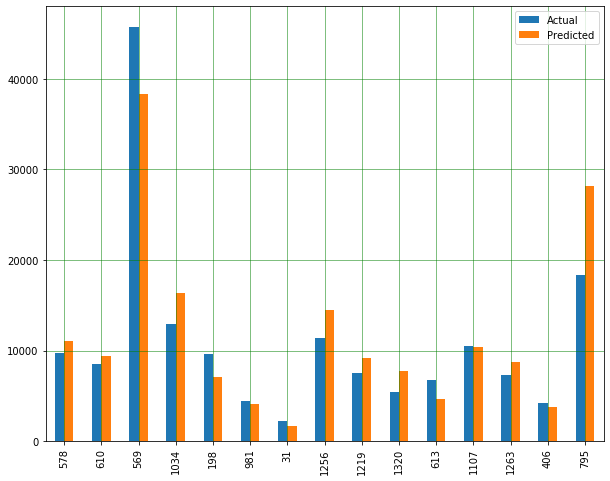

In [293]:
results.head(15).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Polynomial Regression

In [262]:
from sklearn.preprocessing import PolynomialFeatures

In [319]:
quad = PolynomialFeatures(degree=2)
x_quad = quad.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_quad, y, random_state=0)

In [326]:
plr = lm.fit(X_train,y_train)

In [291]:
print(r2_score(y_test,y_pred_plr))

0.8753681786357402


In [287]:
print('MAE: ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  4012.7152768530855
MSE:  32135747.239381798
RMSE:  5668.840025911985


In [ ]:
results.head(15).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [295]:
results_plr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_plr.head()

,Actual,Predicted
578,9724.53000,11121.101409
610,8547.69130,9369.083452
569,45702.02235,38349.258807
1034,12950.07120,16331.935006
198,9644.25250,7041.227706


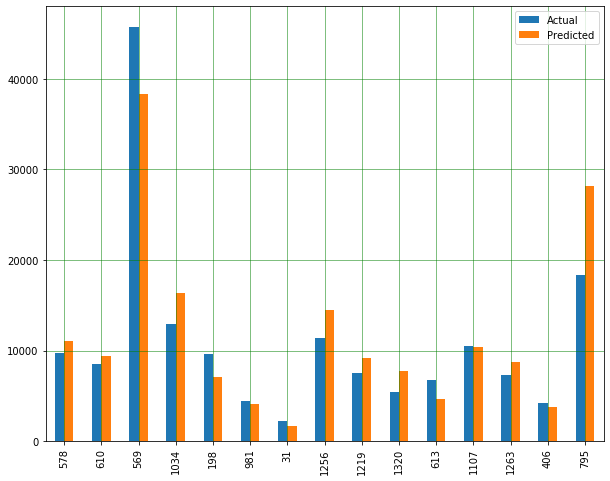

In [297]:
results_plr.head(15).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()